In [20]:
import torch
print(torch.__version__)

1.12.0+cu113


In [21]:
# Download dataset from MNIST library
import torchvision
from torchvision.datasets import MNIST

dataset = MNIST(root='data/', download=True, transform=torchvision.transforms.ToTensor())

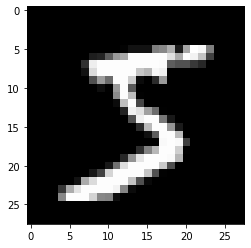

5


In [22]:
# Plot the first image in the dataset
import matplotlib.pyplot as plt
image, label = dataset[0]
plt.imshow(image[0], cmap='gray')
plt.show()
print(label)

In [23]:
# Split data into training and validation sets
trainData, valData = torch.utils.data.random_split(dataset, [50000, 10000])
print(len(trainData), len(valData))

50000 10000


In [24]:
# Initialize data loaders for training and validation data
trainDataLoader = torch.utils.data.DataLoader(trainData, batch_size=100, shuffle=True)
valDataLoader = torch.utils.data.DataLoader(valData, batch_size=100, shuffle=True)

# **Artificial Neural Network Model**

In [25]:
import torch.nn as nn

class ArtificialNeuralNetwork(nn.Module):
  def __init__(self, inputSize, hiddenLayerSize, outputSize):
    super().__init__()
    self.linear1 = nn.Linear(inputSize, hiddenLayerSize)
    self.linear2 = nn.Linear(hiddenLayerSize, outputSize)
  
  def forward(self, x):
    x = x.view(x.size(0), -1)
    y = self.linear1(x)
    y = nn.functional.relu(y)
    y = self.linear2(y)
    return y

In [26]:
inputSize = 784
hiddenLayerSize = 32
outputSize = 10

model = ArtificialNeuralNetwork(inputSize, hiddenLayerSize, outputSize)

for layer in model.parameters():
  print(layer.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


# **Training the Model**

In [27]:
import numpy as np

def train(model, train_loader, learning_rate, epochs, opt_fun=torch.optim.SGD):
  optimizer = opt_fun(model.parameters(), learning_rate)
  for epoch in range(epochs):
    lossVals = []
    for batch in train_loader:
      images, labels = batch
      predictedLabels = model(images)
      loss = nn.functional.cross_entropy(predictedLabels, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      lossVals.append(loss.item())
    
    meanLoss = np.array(lossVals)
    meanLoss = np.mean(meanLoss)
    print('epoch [{}]: loss = {}'.format(epoch + 1, meanLoss))
  
  print('Model has been trained.')

In [28]:
train(model, trainDataLoader, 0.1, 20)

epoch [1]: loss = 0.5809274967014789
epoch [2]: loss = 0.3018202460706234
epoch [3]: loss = 0.2606301404386759
epoch [4]: loss = 0.22899931165575982
epoch [5]: loss = 0.20297725833952426
epoch [6]: loss = 0.18333931542187928
epoch [7]: loss = 0.16898160803318024
epoch [8]: loss = 0.15625277004018426
epoch [9]: loss = 0.1464582878574729
epoch [10]: loss = 0.13856759721040726
epoch [11]: loss = 0.13091872162744403
epoch [12]: loss = 0.1243925538994372
epoch [13]: loss = 0.11833941179141402
epoch [14]: loss = 0.11292070300132036
epoch [15]: loss = 0.10839540053904057
epoch [16]: loss = 0.10448592339083553
epoch [17]: loss = 0.10067031091451645
epoch [18]: loss = 0.09732563017681241
epoch [19]: loss = 0.09362224443629384
epoch [20]: loss = 0.08993559738993645
Model has been trained.


# **Validating the Model**

In [31]:
# Computes the accuracy of the model
def accuracy(output, labels):
  _, predictions = torch.max(output, dim=1)
  return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

In [48]:
def testing(model, val_loader):
  valArray = []
  for batch in val_loader:
    images, labels = batch
    predictedLabels = model(images)
    valArray.append(accuracy(predictedLabels, labels).item())
  
  valArray = np.array(valArray)
  meanAccuracy = np.mean(valArray)

  return meanAccuracy

In [49]:
validationAccuracy = testing(model, valDataLoader)
validationAccuracy

0.9631000053882599

# **Testing the Model on a test set**

In [50]:
testDataset = MNIST(root='data/', train=False, transform=torchvision.transforms.ToTensor())
len(testDataset)

10000

In [51]:
testDataLoader = torch.utils.data.DataLoader(testDataset, batch_size=100, shuffle=True)

In [52]:
testingAccuracy = testing(model, testDataLoader)
testingAccuracy

0.964700003862381

The validation set accuracy (**96.3%**) and test set accuracy (**96.5%**) are approximately equal. This suggests that the hyperparameters have been tuned properly, and the model is also able to generalize itself to unseen or new data.